## Lending Club case study

**Aim**: To identify the driving factors behind loan default, i.e. the variables which are strong indicators of default.<br>So that the company can utilise this knowledge to reduce the credit loss
<br>
Steps of approach
<br>
> The problem can be divided into 3 main parts:
> 1. Understanding and cleaning the data (Removing missing values and un wanted information)
> 2. Analysing the data (Identifying the driving variables and their affects on the default)
> 3. Conclusion (Drawing conclusions from the above)

 ## <font color = blue> 1. Understanding and Cleaning the data

In [2]:
import numpy as np
import pandas as pd

# reading data files
# using encoding = "ISO-8859-1" to avoid pandas encoding error

loan = pd.read_csv("loan.csv", encoding = 'iso-8859-1', sep = ',')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#first 10 rows of the data
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
print(loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


As you can see there are <br>
**111 columns**<br>
**39717 rows/enries**<br>

In [5]:
#To increase the display width of the data (i.e. #columns,rows)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [6]:
#getting the number of null values in each column
loan.isna().sum(axis=0)

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


as you can see there are various null values in different columns<br>
varying in number from 39 to 697 to 39717<br>
lets look at the percentage of null values in each column

In [7]:
round(loan.isnull().sum()/len(loan.index), 2)*100


id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


There are many columns with 100% null values<br>
two coulms at level 65 and 33 <br>
the 65 level one - deliquency - not necessary <br>
the 33 level one desc - loan description by the borrower - not necessary<br>
These columns don't add any value to the data analysis, so lets remove them so we can remove the columns above 32 <br>

In [8]:
#now lets remove these columns
removecolumn = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 32]
print(removecolumn)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc

In [9]:
loan=loan.drop(removecolumn,axis=1)

In [10]:
#lets recheck again for the percent of null values in each column
round(loan.isnull().sum()/len(loan.index), 2)*100


id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_title                     6.0
emp_length                    3.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal     

<br>just to be sure we can also check row wise missing values

In [11]:
#counting number of rows having more than 10 missing values
len(loan[loan.isna().sum(axis=1)>10].index)

0

In [12]:
#counting number of rows having more than 5 missing values
len(loan[loan.isna().sum(axis=1)>5].index)

0

In [13]:
#counting number of rows having more than 3 missing values
len(loan[loan.isna().sum(axis=1)>3].index)

41

As there are only 41 out of 39717 rows that have mising values of 5>X>3 - we can ignore them

In [14]:
#checking for number of unique values in each column
loan.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

There are some columns which have a single value hence they have no effect on the target variable "loan status", <br>because thought these columns don't change the values of the target variable are changing<br>hence we can remove these columns

In [15]:
loan = loan.drop(["pymnt_plan","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens"],axis=1)

In [16]:
loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.00,0.00,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.00,0.00,10110.840000,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.00,0.00,3939.135294,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.00,0.00,646.020000,646.02,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,other,Building my credit history.,774xx,TX,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.00,0.00,1476.190000,1469.34,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,Mar-13,0.0


_Now we can assume the data is failrly clean from missing values perspective and we can safely go ahead with this<br>
Now lets check for the formats of the columns_

In [17]:
print (loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 44 columns):
id                         39717 non-null int64
member_id                  39717 non-null int64
loan_amnt                  39717 non-null int64
funded_amnt                39717 non-null int64
funded_amnt_inv            39717 non-null float64
term                       39717 non-null object
int_rate                   39717 non-null object
installment                39717 non-null float64
grade                      39717 non-null object
sub_grade                  39717 non-null object
emp_title                  37258 non-null object
emp_length                 38642 non-null object
home_ownership             39717 non-null object
annual_inc                 39717 non-null float64
verification_status        39717 non-null object
issue_d                    39717 non-null object
loan_status                39717 non-null object
url                        39717 non-null object
purpose   

**If you see the columns suchas _term, int_rate, emp_length_ are type objects<br>
Lets convert them into numbers (float/int) type**<br>
This is becuse the columns contains strings, that is, the values of the columns are as following
<br>*term* - 36 'months'
<br>*intrest rate* - 10'%'
<br>*emp leght* - 10'+ years', <1 'year'
<br> so lets convert them into numeric by stripping these strings as following

In [18]:
# First lets drop the missing values from these columns to avoid error during coversion
loan = loan[~loan['term'].isnull()]
loan = loan[~loan['int_rate'].isnull()]
loan = loan[~loan['emp_length'].isnull()]

# Let's convert term to int
loan['term'] = loan['term'].apply(lambda x: pd.to_numeric(x.split()[0]))

#Let's convert int_rate to float
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

import re

#Let's convert emp_length to int
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(re.findall('\d+', str(x))[0]))

loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 44 columns):
id                         38642 non-null int64
member_id                  38642 non-null int64
loan_amnt                  38642 non-null int64
funded_amnt                38642 non-null int64
funded_amnt_inv            38642 non-null float64
term                       38642 non-null int64
int_rate                   38642 non-null float64
installment                38642 non-null float64
grade                      38642 non-null object
sub_grade                  38642 non-null object
emp_title                  37202 non-null object
emp_length                 38642 non-null int64
home_ownership             38642 non-null object
annual_inc                 38642 non-null float64
verification_status        38642 non-null object
issue_d                    38642 non-null object
loan_status                38642 non-null object
url                        38642 non-null object
purpose    

 ## <font color = blue> 2. Analysing the data

The data basically containd three types of the variables <br><br>
**Pre loan variables**<br>
1.Applicant related variables (Age, occupation, Employement details etc.)<br>
2.Loan charecteristics (Amount of loan, Intrest rate, Purpose of the loan etc.)<br>
**Post loan variables**<br>
3.Customer behaviour variables (Delinquent 2 years, revolving balance, next payment etc.)<br>
<br>
Among these we can remove most of the customer behavior variables<br> This is because customer behaviour variables are not know at the time of approving the loan,
So lets remove them

In [19]:
loan = loan.drop(["delinq_2yrs",
"earliest_cr_line",           
"inq_last_6mths",             
"open_acc",                  
"pub_rec",
"revol_bal",
"revol_util",
"total_acc",
"out_prncp",
"out_prncp_inv",
"total_pymnt",
"total_pymnt_inv",
"total_rec_prncp",
"total_rec_int",
"total_rec_late_fee",
"recoveries",
"collection_recovery_fee",
"last_pymnt_d",
"last_pymnt_amnt",
"last_credit_pull_d"],axis =1)

In [20]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 24 columns):
id                      38642 non-null int64
member_id               38642 non-null int64
loan_amnt               38642 non-null int64
funded_amnt             38642 non-null int64
funded_amnt_inv         38642 non-null float64
term                    38642 non-null int64
int_rate                38642 non-null float64
installment             38642 non-null float64
grade                   38642 non-null object
sub_grade               38642 non-null object
emp_title               37202 non-null object
emp_length              38642 non-null int64
home_ownership          38642 non-null object
annual_inc              38642 non-null float64
verification_status     38642 non-null object
issue_d                 38642 non-null object
loan_status             38642 non-null object
url                     38642 non-null object
purpose                 38642 non-null object
title              

In [21]:
# We can further remove columns such as url, zip_code, title, addr_state
loan = loan.drop(["url","title","zip_code","addr_state"], axis =1)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,NaN
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,NaN
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,NaN
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,NaN


### Derived metrics
Further we can derive some columns
Such as <br> year and month from issue_d
<br> Also ratio such as anual income/loan amount

In [22]:
#splitting the issued_d into month and year
loan['issue_m'] = loan['issue_d'].apply(lambda x: x.split("-")[0])#month
loan['issue_y'] = loan['issue_d'].apply(lambda x: x.split("-")[1])#year
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_m,issue_y
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Dec,11
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Dec,11
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0,Dec,11
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0,Dec,11
4,1075358,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,0.0,Dec,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,NaN,Jul,07
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,NaN,Jul,07
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,NaN,Jul,07
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,NaN,Jul,07


In [23]:
#lets define payable capacity = anual income/loan amount
loan['payable_capacity'] = loan['annual_inc']/loan['loan_amnt']

In [24]:
#Now before entering into the analysis, lets change our target variable
print(loan.loan_status.unique())

['Fully Paid' 'Charged Off' 'Current']


In [25]:
#lets remove the entries which have "current status", this is because we can't get any insights from these entries
new_loan=loan[loan['loan_status'] != 'Current']
new_loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_m,issue_y,payable_capacity
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,0.0,Dec,11,4.800000
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,0.0,Dec,11,12.000000
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,0.0,Dec,11,5.105000
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,0.0,Dec,11,4.920000
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20,0.0,Dec,11,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,11.33,NaN,Jul,07,44.000000
39713,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,6.40,NaN,Jul,07,2.117647
39714,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,1,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,2.30,NaN,Jul,07,20.000000
39715,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,1,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,3.72,NaN,Jul,07,40.000000


In [26]:
#Now lets insert for all fully paid = 0 and charged off = 1
new_loan['loan_status'] = new_loan['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)
new_loan['loan_status'].describe()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count    37544.000000
mean         0.143805
std          0.350896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

now lets proceed with univariate analysis of all the variables

## Univariate analysis

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

Now lets analyse each column and compare it with loan_status to its effect on loan_status<br>
Also if bucketing of these colums is possible then lets do the comparision using buckets as well

### 1. loan_amnt

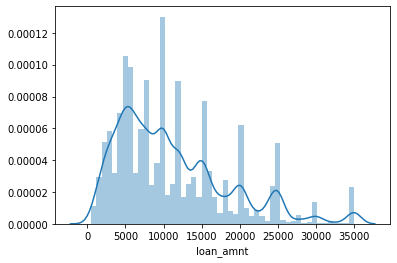

In [28]:
sns.distplot(new_loan['loan_amnt'])
plt.show()

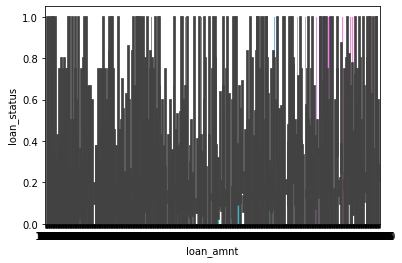

In [29]:

sns.barplot(x='loan_amnt', y='loan_status', data=new_loan)
plt.show()

In [30]:
#These plots doesn't make much sense so lets do bucketing
buckets = [0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
new_loan['loan_amnt_bins'] = pd.cut(new_loan['loan_amnt'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


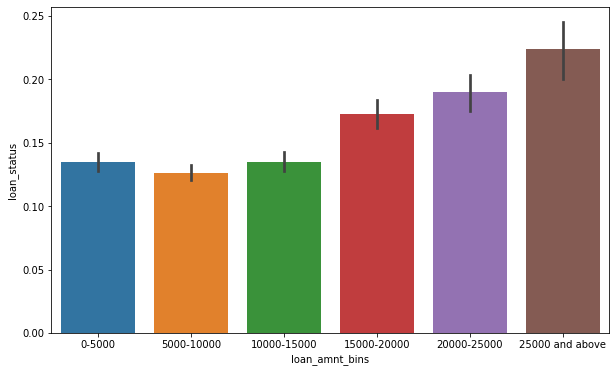

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(x='loan_amnt_bins', y='loan_status', data=new_loan)
plt.show()

### <font color = orange> Observation
<font color = orange> You can notice apart from first bin, as the loan amount increases the default rate increases as well </font>

### 2. Funded_amnt_inv
It is a range variable so similar to loan amnt lets bucket it

In [32]:
buckets = [0, 5000, 10000, 15000, 20000, 25000, 40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
new_loan['funded_amnt_inv'] = pd.cut(new_loan['funded_amnt_inv'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


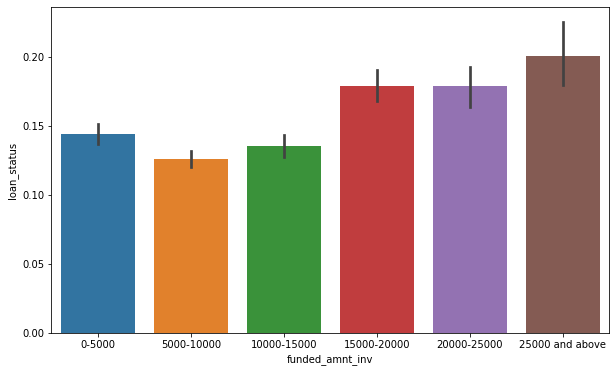

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='funded_amnt_inv', y='loan_status', data=new_loan)
plt.show()

### <font color = brown> Observation
<font color = purple> follows the same pattern as the loan amount, that is, as the funded amount increases so does the default rate<br> It simply meams that higher loan amounts are likely to get charged of compared to lower loan amounts </font>

### 3. Term

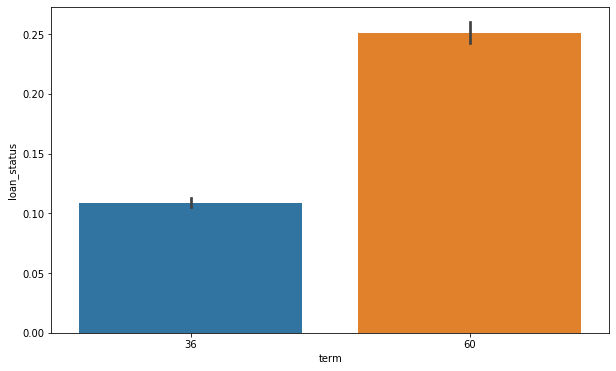

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='term', y='loan_status', data=new_loan)
plt.show()

### <font color = brown> Observation
<font color = purple> Longer the loan term higher is the default rate </font>

### 4. Interest rate

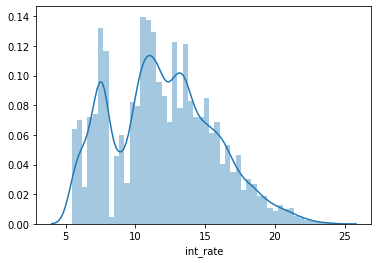

In [35]:
sns.distplot(new_loan['int_rate'])
plt.show()


It is a range variable so lets bucket it

In [36]:
buckets = [0, 5.0, 7.5, 10, 12.5, 15,20]
slot = ['0-5.0','5-7.5','7.5-10', '10-12.5', '12.5-15', '15 and above']
new_loan['int_rate_range'] = pd.cut(new_loan['int_rate'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


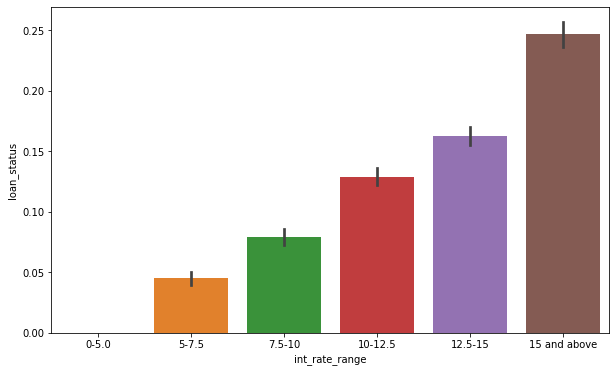

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_range', y='loan_status', data=new_loan)
plt.show()

### <font color = brown> Observation
<font color = purple> As the Interest range icreases loan defaults increases as well </font>

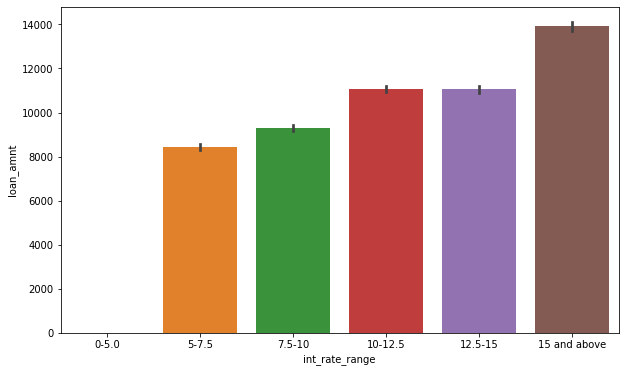

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='int_rate_range', y='loan_amnt', data=new_loan)
plt.show()

### <font color = brown> Observation
<font color = purple> High loan amounts have high interest range </font>

### 5. Grade

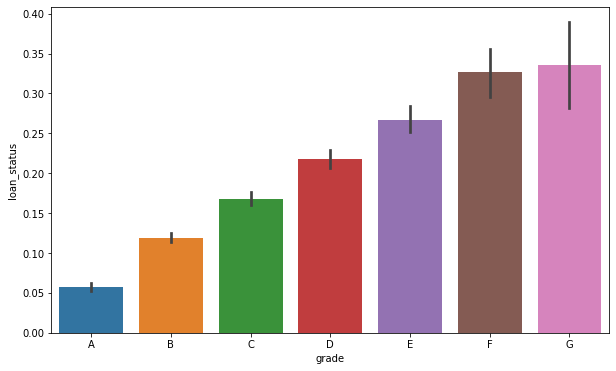

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='grade', y='loan_status', data=new_loan, order = ['A','B', "C", 'D','E','F','G'])
plt.show()

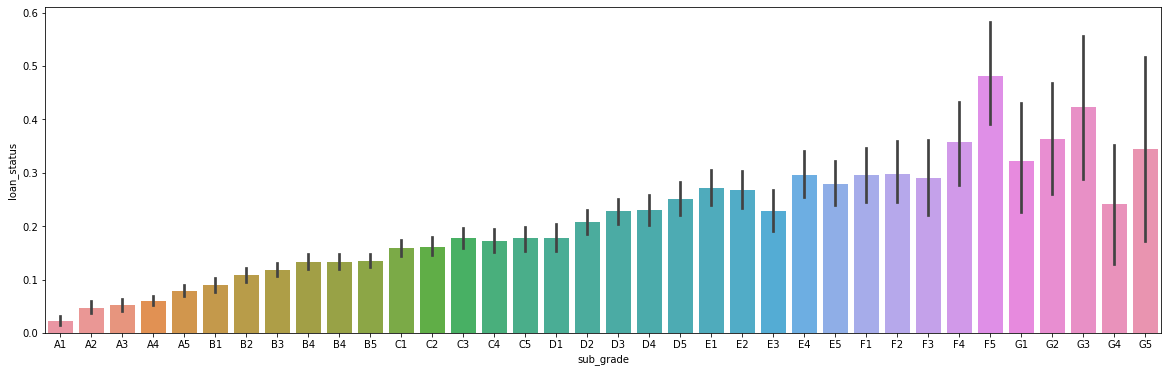

In [40]:
plt.figure(figsize=(20, 6))
sns.barplot(x='sub_grade', y='loan_status', data=new_loan, order = ['A1','A2','A3','A4','A5','B1','B2','B3','B4','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
plt.show()

### <font color = brown> Observation
<font color = purple> As the grade changes from A to G the default rate increased as well, this makes sense because "G" grade loans are riskier than that of "A" <br>The sub grade, they follow the same trend except at E3, G1 and G4 </font>

### 6. Installment

In [41]:
new_loan["installment"].describe()

count    37544.000000
mean       324.650164
std        208.901055
min         15.690000
25%        167.370000
50%        280.000000
75%        428.942500
max       1305.190000
Name: installment, dtype: float64

In [42]:
#bucketing installments
buckets = [0,200, 400, 600, 800, 1000]
slot = ['0-200','200-400','400-600', '600-800', '800 and above']
new_loan['installments_range'] = pd.cut(new_loan['installment'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


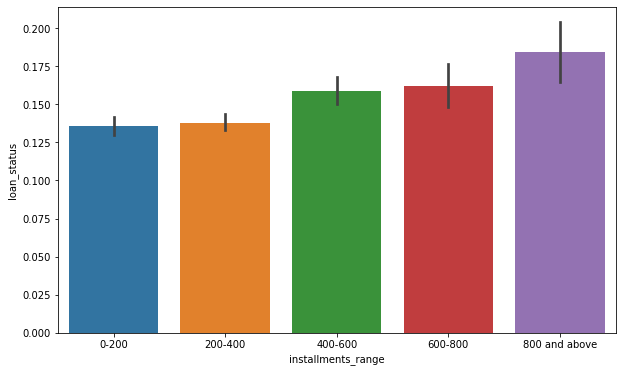

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installments_range', y='loan_status', data=new_loan)
plt.show()

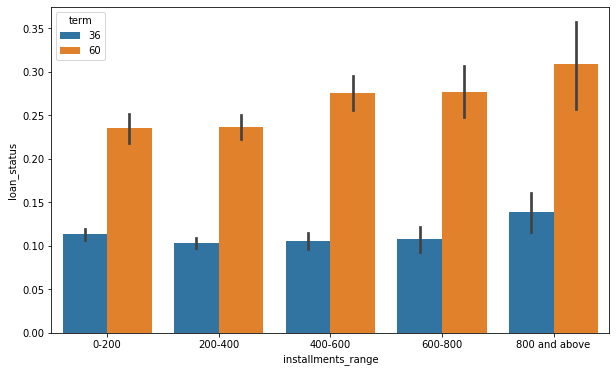

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x='installments_range', y='loan_status', hue= 'term', data=new_loan)
plt.show()

### <font color = brown> Observation
<font color = purple> As the installemts increase the default rate increases as well. <br> Also if you observe the default rate doesn't change much at 36 term level but at 60 term level it graduallly increase <br> **so longer term loans with high installemnts are likely to default more** </font>

### 7. Employment length and title

In [45]:
#bucketing emp_length
buckets = [0,2, 4, 6, 8, 10]
slot = ['0-2','2-4','4-6', '6-8', '8 and above']
new_loan['emp_range'] = pd.cut(new_loan['emp_length'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


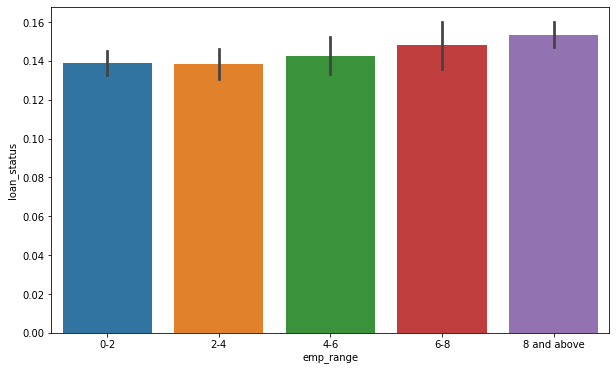

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='emp_range', y='loan_status', data=new_loan)

plt.show()

In [47]:
new_loan['emp_title'].describe()

count       36136
unique      27982
top       US Army
freq          131
Name: emp_title, dtype: object

### <font color = brown> Observation
<font color = purple> There isn't much variation in emp_length and there are 27,982 unique values in emp_title<br> so it doesn't help either. So Default rate, isn't much affected by these variables</font>

### 8. Home ownership

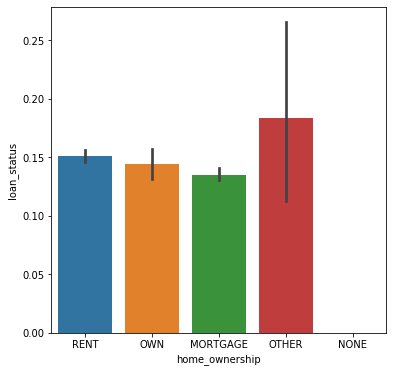

In [48]:
plt.figure(figsize=(6, 6))
sns.barplot(x='home_ownership', y='loan_status', data=new_loan)

plt.show()

### <font color = brown> Observation
<font color = purple> Nothing much can be decided</font>

### 9. Verification status

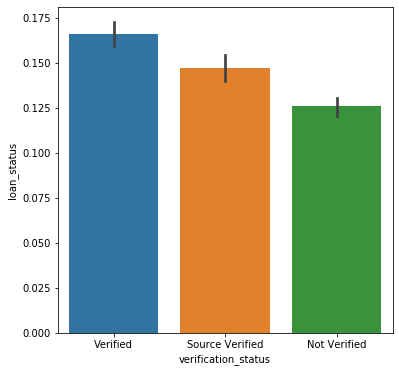

In [49]:
plt.figure(figsize=(6, 6))
sns.barplot(x='verification_status', y='loan_status', data=new_loan)

plt.show()

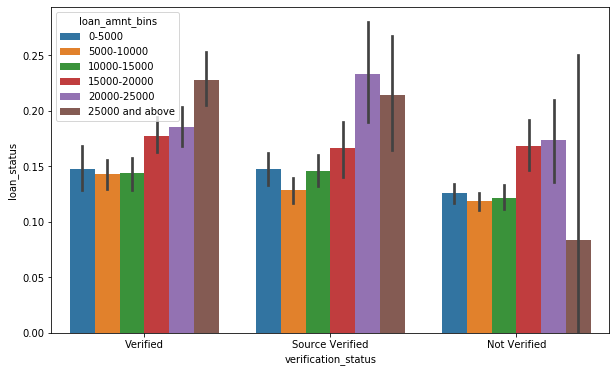

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='verification_status', y='loan_status', hue='loan_amnt_bins', data=new_loan)

plt.show()

### <font color = brown> Observation
<font color = purple> Verified loans have higher defalut rate, this shouldn't be the case in general, so have segmented it further based on loan amounts.<br>
 Higher loan amounts are Verified more often, and high loan amounts only have high default rates - so this justifies why verfied loans have high default percentage, that is because they contain maximum portion of high loans.</font>

### 9. Issue month and Issue year

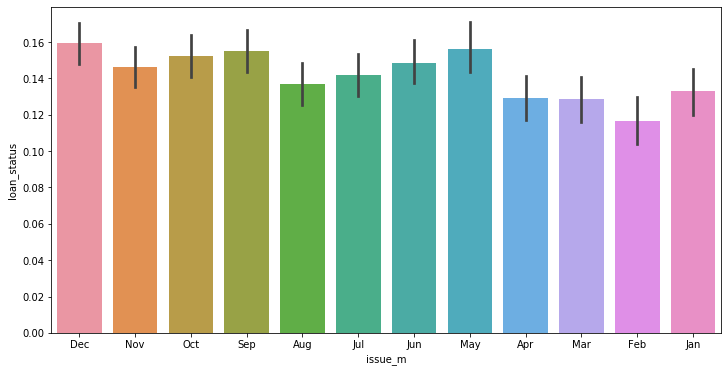

In [51]:
plt.figure(figsize=(12, 6))
sns.barplot(x='issue_m', y='loan_status', data=new_loan)

plt.show()

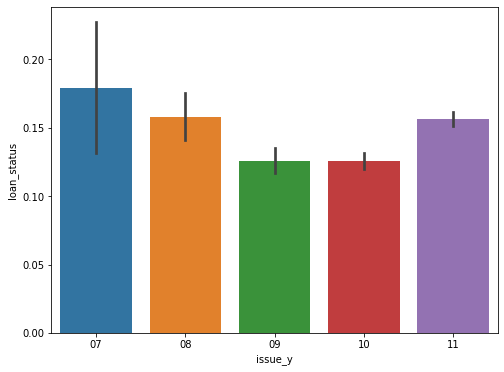

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(x='issue_y', y='loan_status', data=new_loan)

plt.show()

### <font color = brown> Observation
<font color = purple> Not much help full, no variation month wise,<br> year wise the defaults have decreased upto 2009 same range upto 2010 and icreased again in 2011.</font>

### 10. Payable capacity

In [53]:
new_loan['payable_capacity'].describe()

count    37544.000000
mean         9.007466
std         14.002213
min          1.204819
25%          4.000000
50%          6.161790
75%         10.213324
max       1266.666667
Name: payable_capacity, dtype: float64

In [54]:
#bucketing payable capacity
buckets = [0,2, 4, 6, 8, 10]
slot = ['0-2','2-4','4-6', '6-8', '8 and above']
new_loan['payable_range'] = pd.cut(new_loan['payable_capacity'], buckets, labels=slot)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


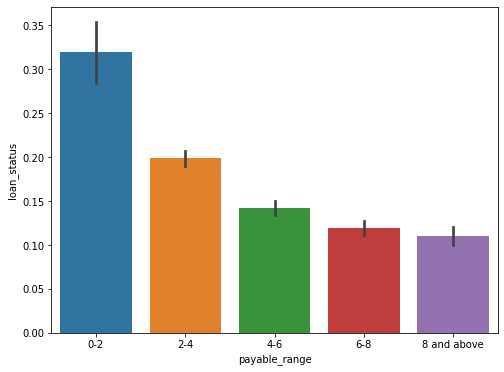

In [55]:
plt.figure(figsize=(8, 6))
sns.barplot(x='payable_range', y='loan_status', data=new_loan)

plt.show()

### <font color = brown> Observation
<font color = purple> As expected people with low anual income and high loan amounts default more.
    This is a very good parameter
    </font>

### 11. Purpose

In [56]:
new_loan['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

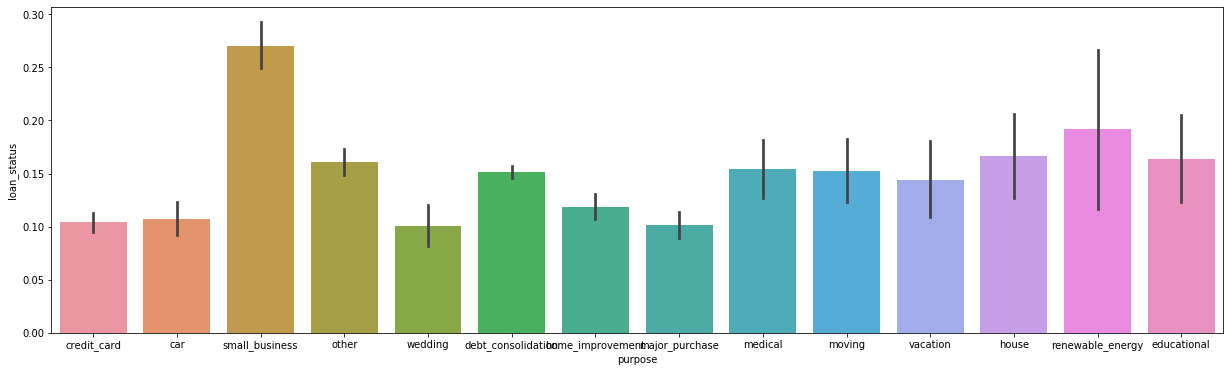

In [57]:
plt.figure(figsize=(21, 6))
sns.barplot(x='purpose', y='loan_status', data=new_loan)

plt.show()

### <font color = brown> Observation
<font color = purple> On an average loan for small businesses have high default rates, followed by renewable energy and house
    </font>

## Segmented Univariate analysis

Lets Identify the categorical variables based on which segmentation can be done
<br>They are
<br>1.Grades
<br>2.Purpose

### 1. Grades

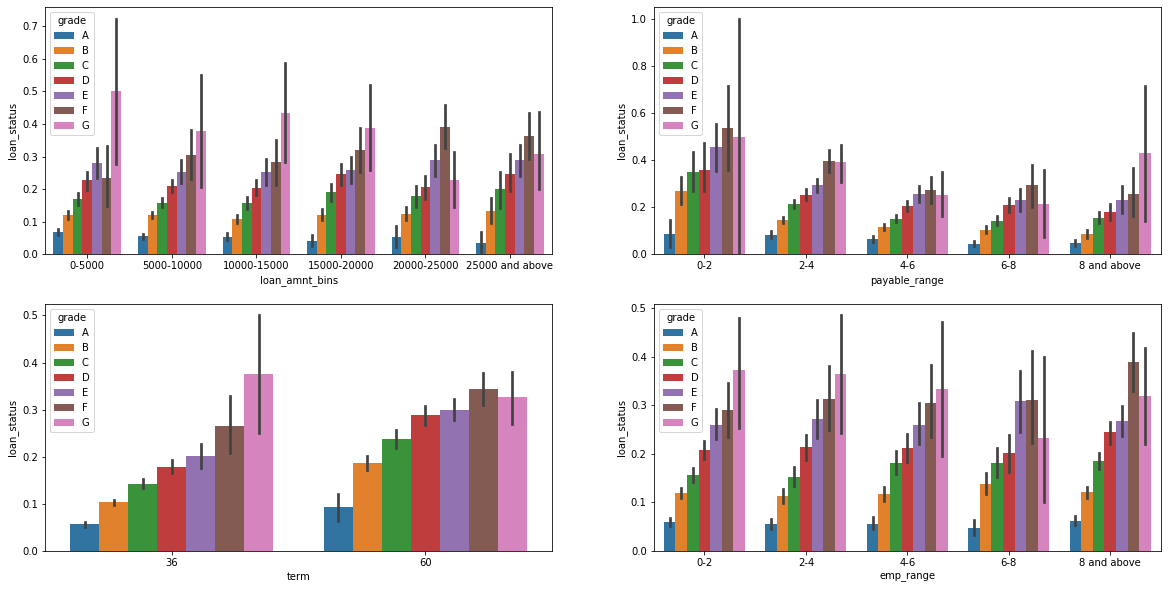

In [58]:
f,axes = plt.subplots (2,2, figsize =(20,10))
sns.barplot(x='loan_amnt_bins', y='loan_status', hue="grade", hue_order=["A","B",'C','D','E','F','G'], data=new_loan, orient='v', ax=axes[0,0])
sns.barplot(x='payable_range', y='loan_status', hue="grade",hue_order=["A","B",'C','D','E','F','G'], data=new_loan, orient='v', ax=axes[0,1])
sns.barplot(x='term', y='loan_status', hue="grade",hue_order=["A","B",'C','D','E','F','G'], data=new_loan, orient='v', ax=axes[1,0])
sns.barplot(x='emp_range', y='loan_status', hue="grade",hue_order=["A","B",'C','D','E','F','G'], data=new_loan, orient='v', ax=axes[1,1])
plt.show()

not much helpfull in getting extra information, lets look at purpose

### 2. Purpose

In [59]:
new_loan['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
other                  3713
home_improvement       2785
major_purchase         2080
small_business         1710
car                    1448
wedding                 913
medical                 656
moving                  552
house                   354
vacation                348
educational             317
renewable_energy         94
Name: purpose, dtype: int64

In [60]:
#Lets do analysis on top 5-6 loans as majority are concentrated in them
main_types = ["debt_consolidation","credit_card","home_improvement","major_purchase","small_business","car"]
df = new_loan[new_loan['purpose'].isin(main_types)]

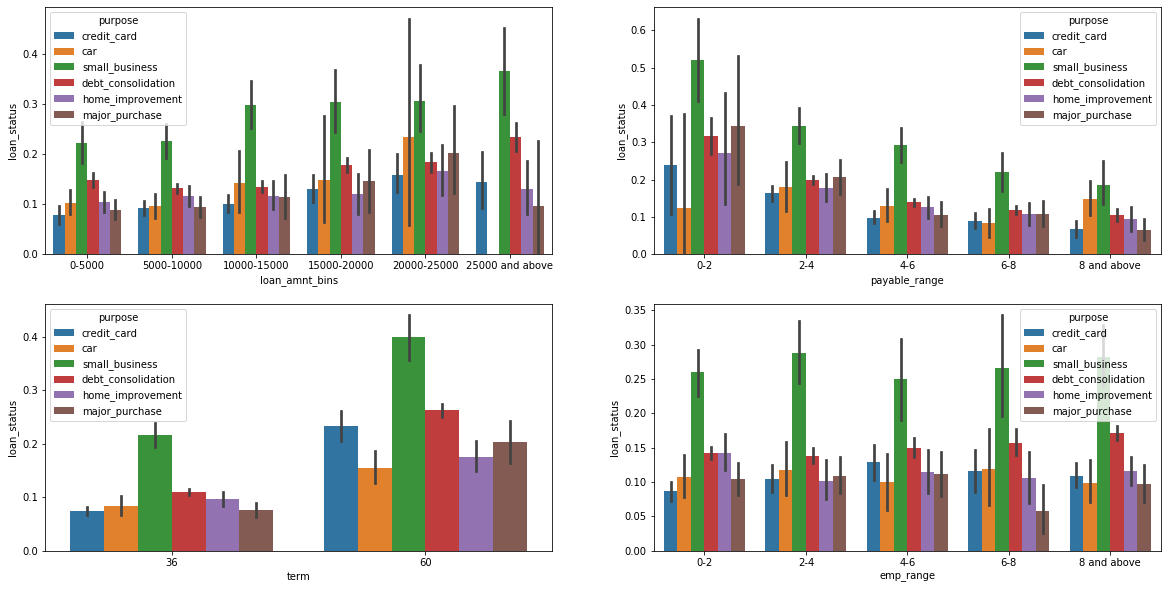

In [61]:
f,axes = plt.subplots (2,2, figsize =(20,10))
sns.barplot(x='loan_amnt_bins', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,0])
sns.barplot(x='payable_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,1])
sns.barplot(x='term', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[1,0])
sns.barplot(x='emp_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[1,1])
plt.show()

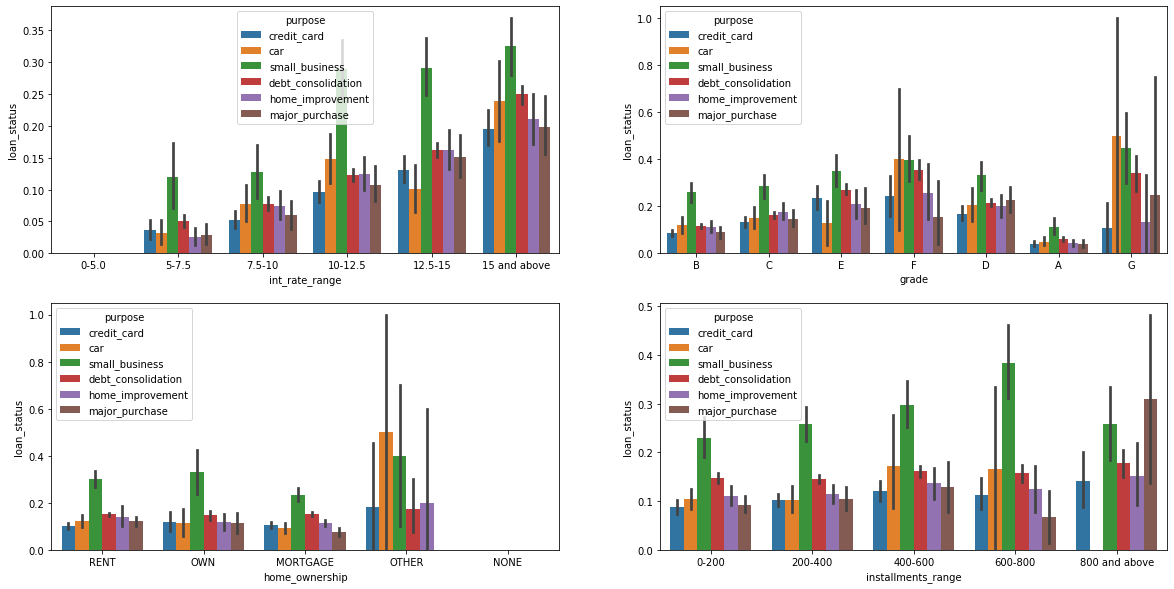

In [62]:
f,axes = plt.subplots (2,2, figsize =(20,10))
sns.barplot(x='int_rate_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,0])
sns.barplot(x='grade', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,1])
sns.barplot(x='home_ownership', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[1,0])
sns.barplot(x='installments_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[1,1])
plt.show()

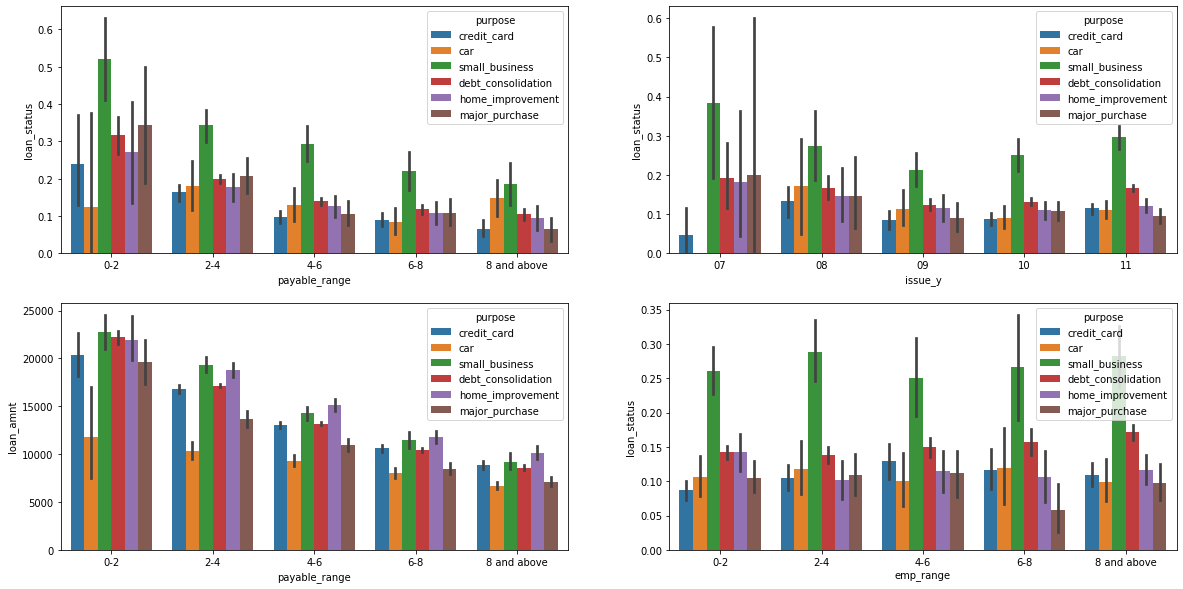

In [63]:
f,axes = plt.subplots (2,2, figsize =(20,10))
sns.barplot(x='payable_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,0])
sns.barplot(x='issue_y', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[0,1])
sns.barplot(x='payable_range', y='loan_amnt', hue="purpose", data=df, orient='v', ax=axes[1,0])
sns.barplot(x='emp_range', y='loan_status', hue="purpose", data=df, orient='v', ax=axes[1,1])
plt.show()

### <font color = brown> Observation
<font color = purple> Overall Small business, and debt_consolidation are riskier loans
    </font>

## Bivariate Analysis

In [64]:
new_loan.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_m,issue_y,payable_capacity,loan_amnt_bins,int_rate_range,installments_range,emp_range,payable_range
0,1077501,1296599,5000,5000,0-5000,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,0.0,Dec,11,4.800000,0-5000,10-12.5,0-200,8 and above,4-6
1,1077430,1314167,2500,2500,0-5000,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,0.0,Dec,11,12.000000,0-5000,15 and above,0-200,0-2,NaN
2,1077175,1313524,2400,2400,0-5000,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,0.0,Dec,11,5.105000,0-5000,15 and above,0-200,8 and above,4-6
3,1076863,1277178,10000,10000,5000-10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,0.0,Dec,11,4.920000,5000-10000,12.5-15,200-400,8 and above,4-6
5,1075269,1311441,5000,5000,0-5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,0.0,Dec,11,7.200000,0-5000,7.5-10,0-200,2-4,6-8
6,1069639,1304742,7000,7000,5000-10000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,47004.0,Not Verified,Dec-11,0,debt_consolidation,23.51,0.0,Dec,11,6.714857,5000-10000,15 and above,0-200,6-8,6-8
7,1072053,1288686,3000,3000,0-5000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,48000.0,Source Verified,Dec-11,0,car,5.35,0.0,Dec,11,16.000000,0-5000,15 and above,0-200,8 and above,NaN
8,1071795,1306957,5600,5600,5000-10000,60,21.28,152.39,F,F2,NaN,4,OWN,40000.0,Source Verified,Dec-11,1,small_business,5.55,0.0,Dec,11,7.142857,5000-10000,NaN,0-200,2-4,6-8
9,1071570,1306721,5375,5375,5000-10000,60,12.69,121.45,B,B5,Starbucks,1,RENT,15000.0,Verified,Dec-11,1,other,18.08,0.0,Dec,11,2.790698,5000-10000,12.5-15,0-200,0-2,2-4
10,1070078,1305201,6500,6500,5000-10000,60,14.65,153.45,C,C3,Southwest Rural metro,5,OWN,72000.0,Not Verified,Dec-11,0,debt_consolidation,16.12,0.0,Dec,11,11.076923,5000-10000,12.5-15,0-200,4-6,NaN


In [65]:
new_loan.drop(['id','member_id','loan_amnt_bins','int_rate_range','installments_range','emp_range','payable_range'], axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,pub_rec_bankruptcies,issue_m,issue_y,payable_capacity
0,5000,5000,0-5000,36,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,0,credit_card,27.65,0.0,Dec,11,4.800000
1,2500,2500,0-5000,60,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,1,car,1.00,0.0,Dec,11,12.000000
2,2400,2400,0-5000,36,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,0,small_business,8.72,0.0,Dec,11,5.105000
3,10000,10000,5000-10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,0,other,20.00,0.0,Dec,11,4.920000
5,5000,5000,0-5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,0,wedding,11.20,0.0,Dec,11,7.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,0-5000,36,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,0,home_improvement,11.33,NaN,Jul,07,44.000000
39713,8500,8500,0-5000,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,0,credit_card,6.40,NaN,Jul,07,2.117647
39714,5000,5000,0-5000,36,8.07,156.84,A,A4,NaN,1,MORTGAGE,100000.0,Not Verified,Jul-07,0,debt_consolidation,2.30,NaN,Jul,07,20.000000
39715,5000,5000,0-5000,36,7.43,155.38,A,A2,NaN,1,MORTGAGE,200000.0,Not Verified,Jul-07,0,other,3.72,NaN,Jul,07,40.000000


(37544, 28)


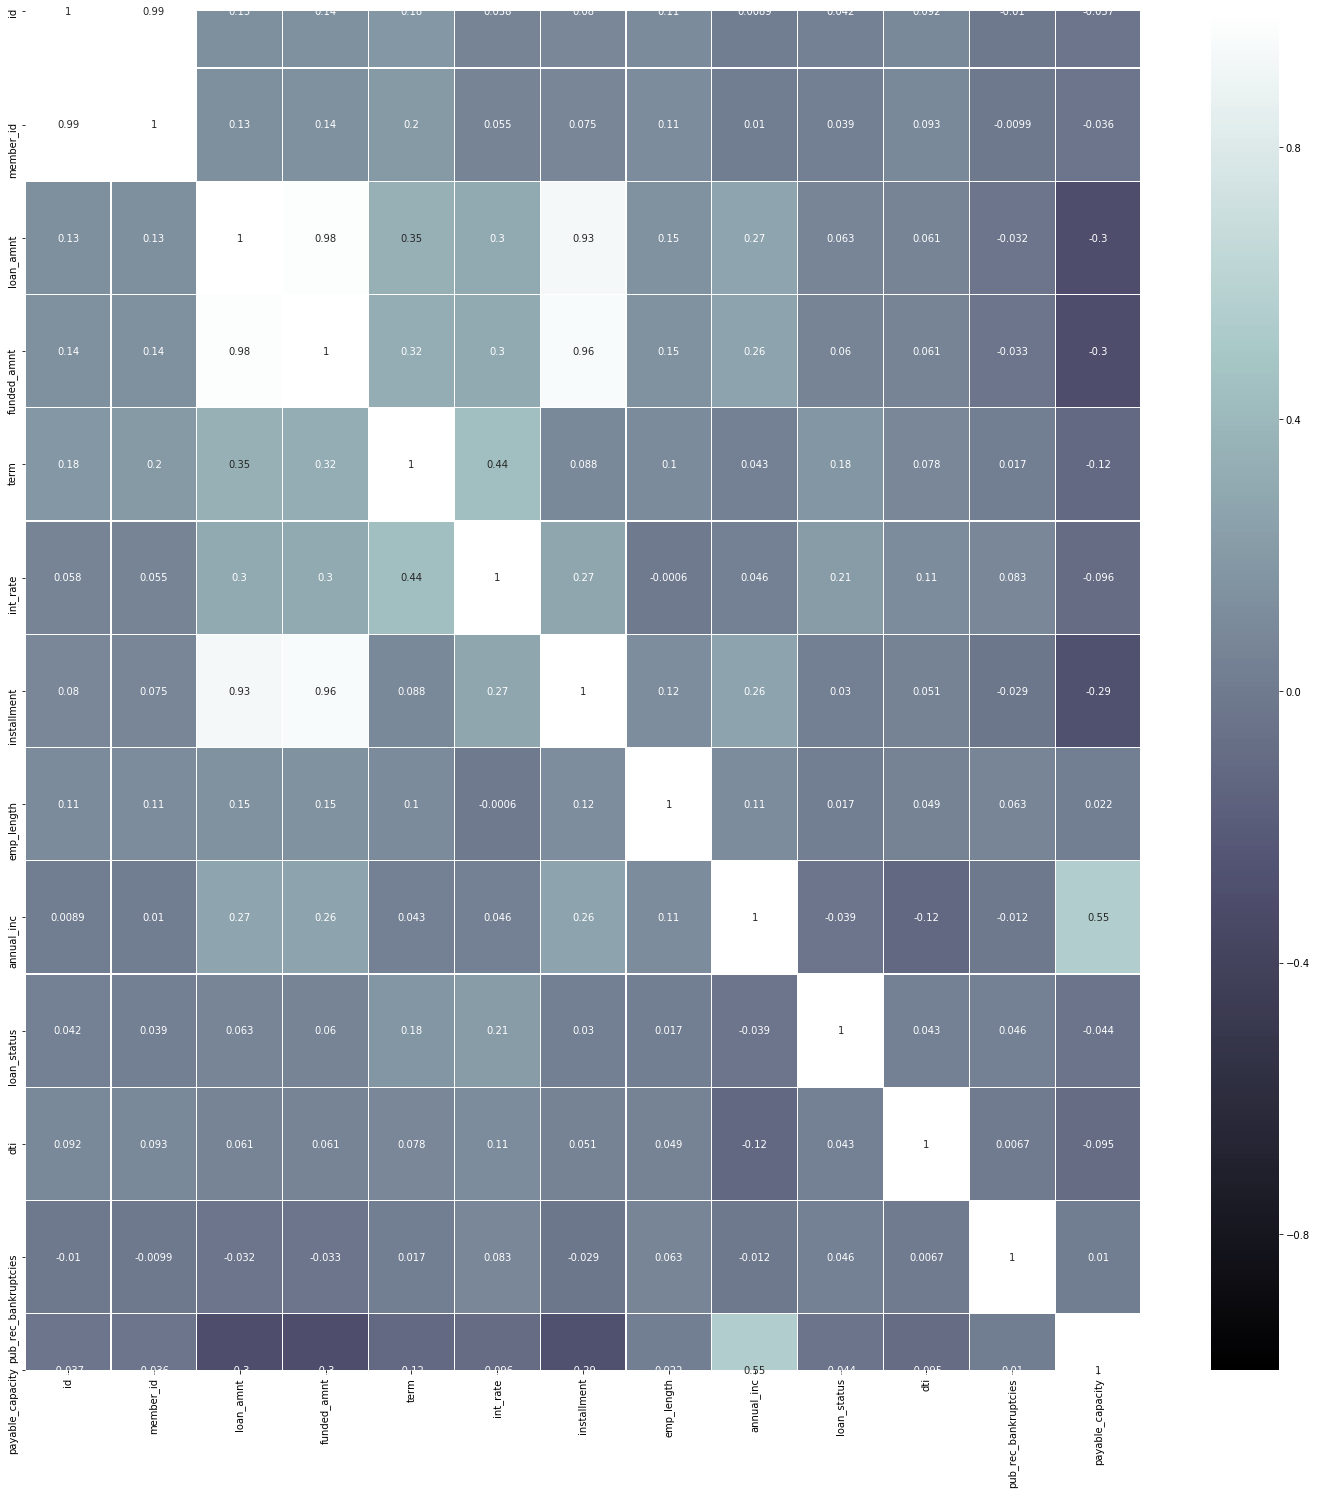

In [66]:
Heat_map=new_loan.corr()   
Heat_map.dropna(axis=1,how='all',inplace=True)
print(new_loan.shape)
Heat_map.dropna(axis=0,how='all',inplace=True)
plt.figure(figsize=(25,25))
sns.heatmap(Heat_map,annot=True,linewidth=0.25, cmap="bone", vmin= -1, vmax =1)
plt.show()

### <font color = brown> Observation
<font color = purple> +vely correlated variables are<br>
1.loan amount, funded amount and installment<br>
2.loan amount and Interst rate, interest rate and term<br>
Higher these variables higher is the default rate
<br>Annual income and Payable capacity are +vely corelated
<br>-vely correlated variables are
<br>Anual income, payable capacity are very less correlated with most of the other variable.
<br>-vely corelated with loan status, so higher these values lower is the default risk of default.

## <font color = blue> 3. Conclusion

1. Loan_ amnt: You can notice apart from first bin, as the loan amount increases the default rate increases as well
2. Funded amount invested: follows the same pattern as the loan amount, that is, as the funded amount increases so does the default rate<br> It simply meams that higher loan amounts are likely to get charged of compared to lower loan amounts
3. Term: Longer the loan term higher is the default rate
4. Interest rate: As the Interest range icreases loan defaults increases as well
5. Grade: As the grade changes from A to G the default rate increased as well, this makes sense because "G" grade loans are riskier than that of "A" <br>The sub grade, they follow the same trend except at E3, G1 and G4 
6. Installemnt: As the installemts increase the default rate increases as well. <br> Also if you observe the default rate doesn't change much at 36 term level but at 60 term level it graduallly increase <br> **so longer term loans with high installemnts are likely to default more** 
7. Emp lenght and title: There isn't much variation in emp_length and there are 27,982 unique values in emp_title<br> so it doesn't help either. So Default rate, isn't much affected by these variables
8. Verification status: Verified loans have higher defalut rate, this shouldn't be the case in general, so have segmented it further based on loan amounts.<br> Higher loan amounts are Verified more often, and high loan amounts only have high default rates - so this justifies why verfied loans have high default percentage, that is because they contain maximum portion of high loans.
9. Issue month and year: Not much help full, no variation month wise,<br> year wise the defaults have decreased upto 2009 same range upto 2010 and icreased again in 2011.
10. Payable ratio (Annual Income/loan ammount): As expected people with low anual income and high loan amounts default more.
    This is a very good parameter
11. Purpose: On an average loan for small businesses have high default rates, followed by renewable energy and house